In [3]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp

In [4]:
### Load Data

data = '../data/labeled/movement_merged.csv'   # merged dataset (movement)
df = pd.read_csv(data, index_col=0)

In [5]:
### Add alpha_r and beta_r difference column

diff_list = []
index = 0

for a in df['alpha_r']:
    diff = a - df.loc[index, 'beta_r']
    diff_list.append(diff)
    index = index + 1

df['ab_r_diff'] = diff_list

In [3]:
### Add 'seconds' column (only for individual files)

counter = 1
seconds = 1
sec_list = []

for x in range(len(df)):
    if counter <= 25:
        sec_list.append(seconds)
        counter = counter + 1
    else:
        seconds = seconds + 1
        sec_list.append(seconds)
        counter = 2

df['seconds'] = sec_list

In [6]:
### Drop some columns and remove first 75 rows

df_analysis = df.drop(['ts_r', 'temp_r', 'mag_x_r', 'mag_y_r', 'mag_z_r', 'ts_n', 'temp_n', 'mag_x_n', 'mag_y_n', 'mag_z_n', 'kal_status_n', 
                        'alpha_n', 'beta_n'], axis=1)
df_analysis.drop(df_analysis[df_analysis['label'] == 'kalibratie'].index, inplace=True)

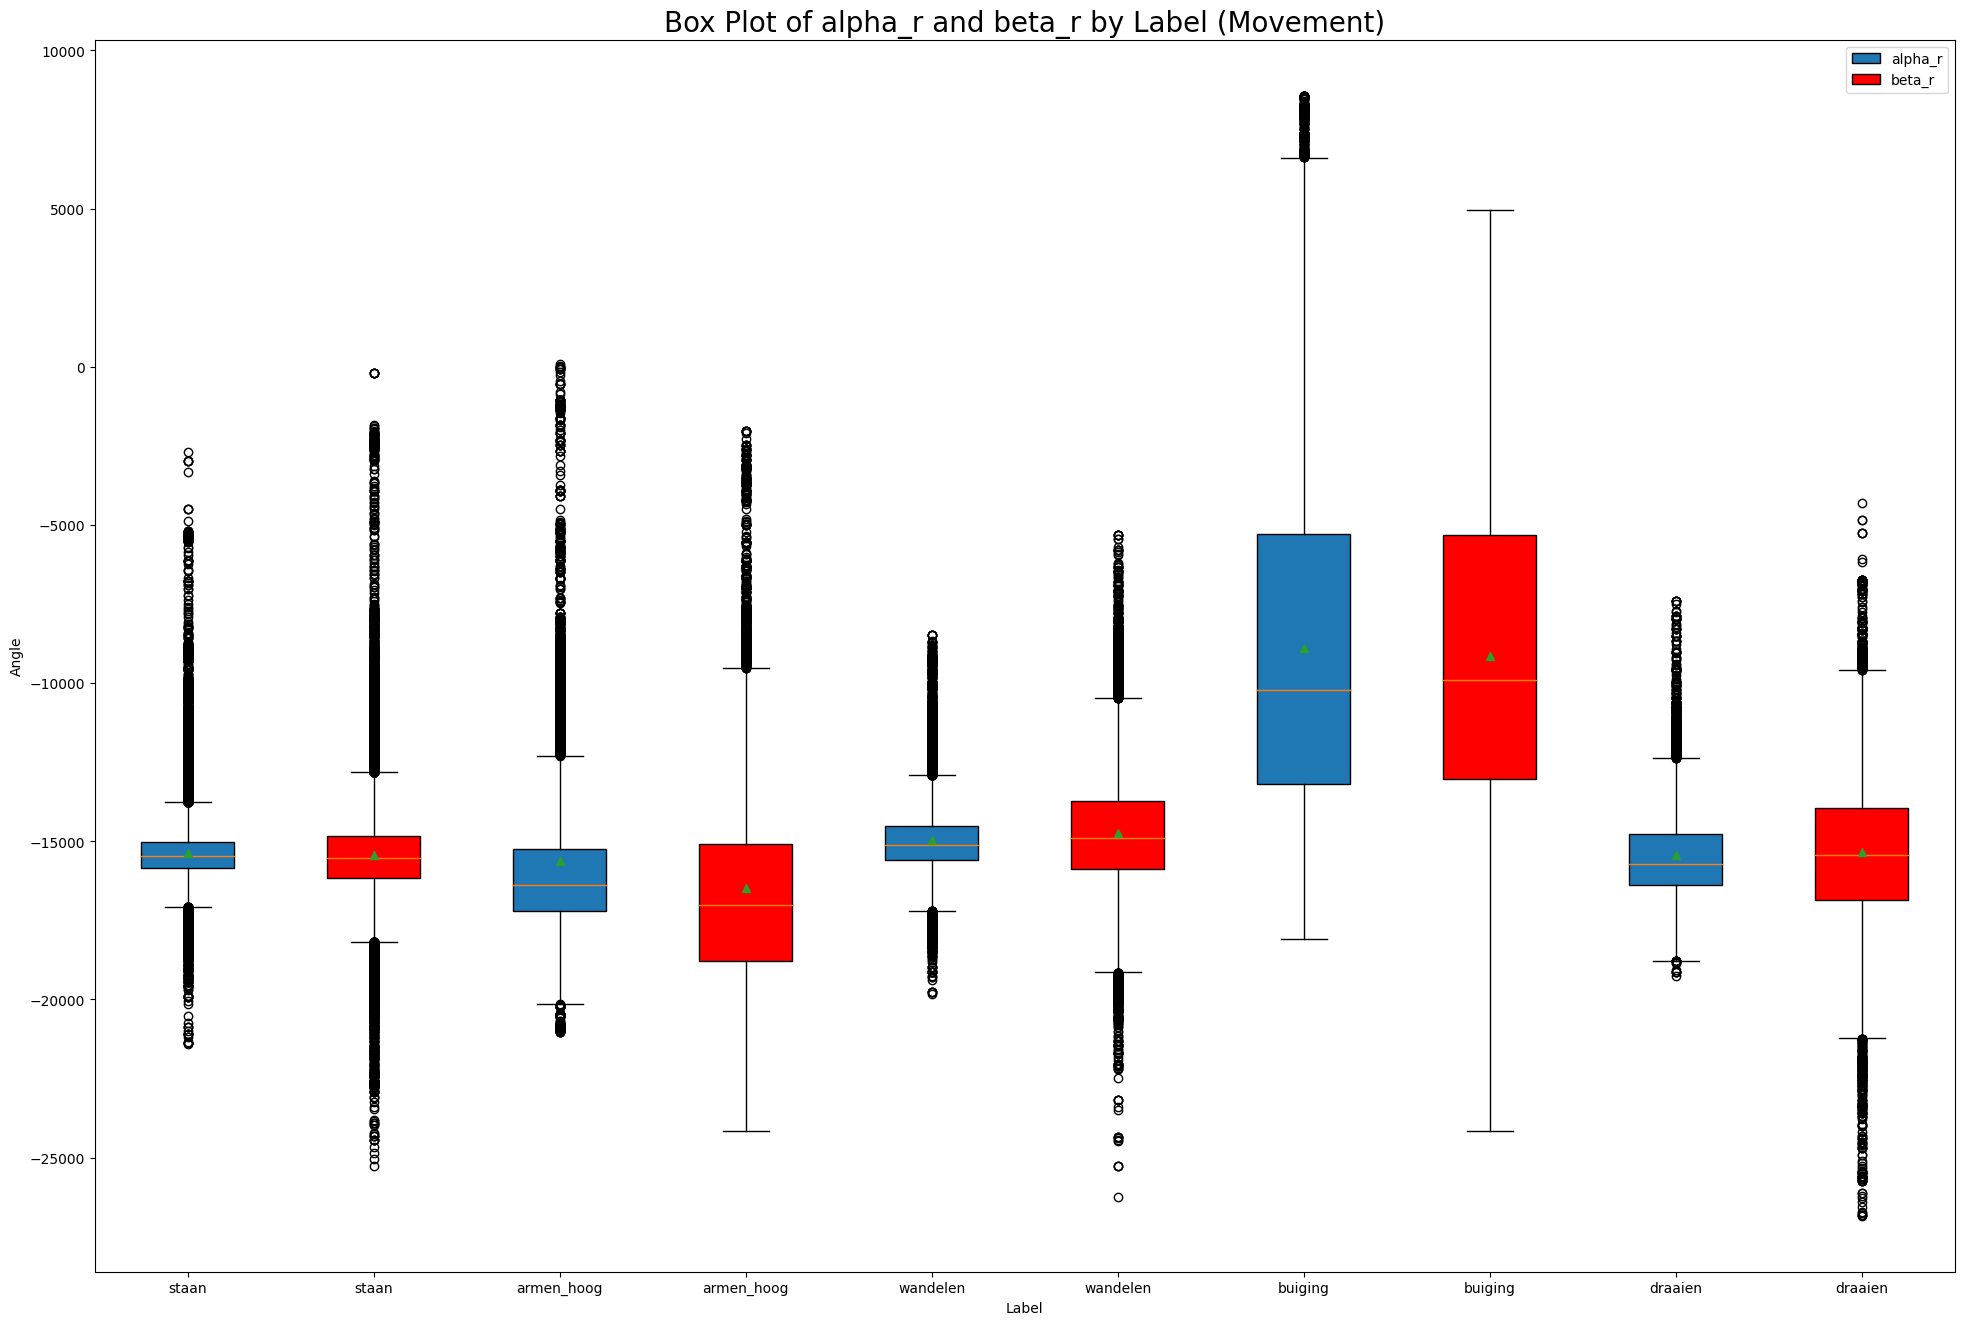

In [10]:
### Box Plot of 'alpha_r' and 'beta_r' by 'label'

fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of alpha_r and beta_r by Label (Movement)", fontsize= 20)
ax.set

data =  [df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
        df_analysis['beta_r'][df_analysis['label'] == 'staan'],
        df_analysis['alpha_r'][df_analysis['label'] == 'armen_hoog'],
        df_analysis['beta_r'][df_analysis['label'] == 'armen_hoog'],
        df_analysis['alpha_r'][df_analysis['label'] == 'wandelen'],
        df_analysis['beta_r'][df_analysis['label'] == 'wandelen'],
        df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
        df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
        df_analysis['alpha_r'][df_analysis['label'] == 'draaien'],
        df_analysis['beta_r'][df_analysis['label'] == 'draaien']]

bp = ax.boxplot(data,
           labels= ['staan', 'staan', 'armen_hoog', 'armen_hoog', 'wandelen', 'wandelen', 'buiging', 'buiging', 
           'draaien', 'draaien'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('red')
bp['boxes'][3].set_facecolor('red')
bp['boxes'][5].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][9].set_facecolor('red')

plt.xlabel("Label")
plt.ylabel("Angle")
plt.legend([bp['boxes'][0], bp['boxes'][1]], ['alpha_r', 'beta_r'])

plt.show()

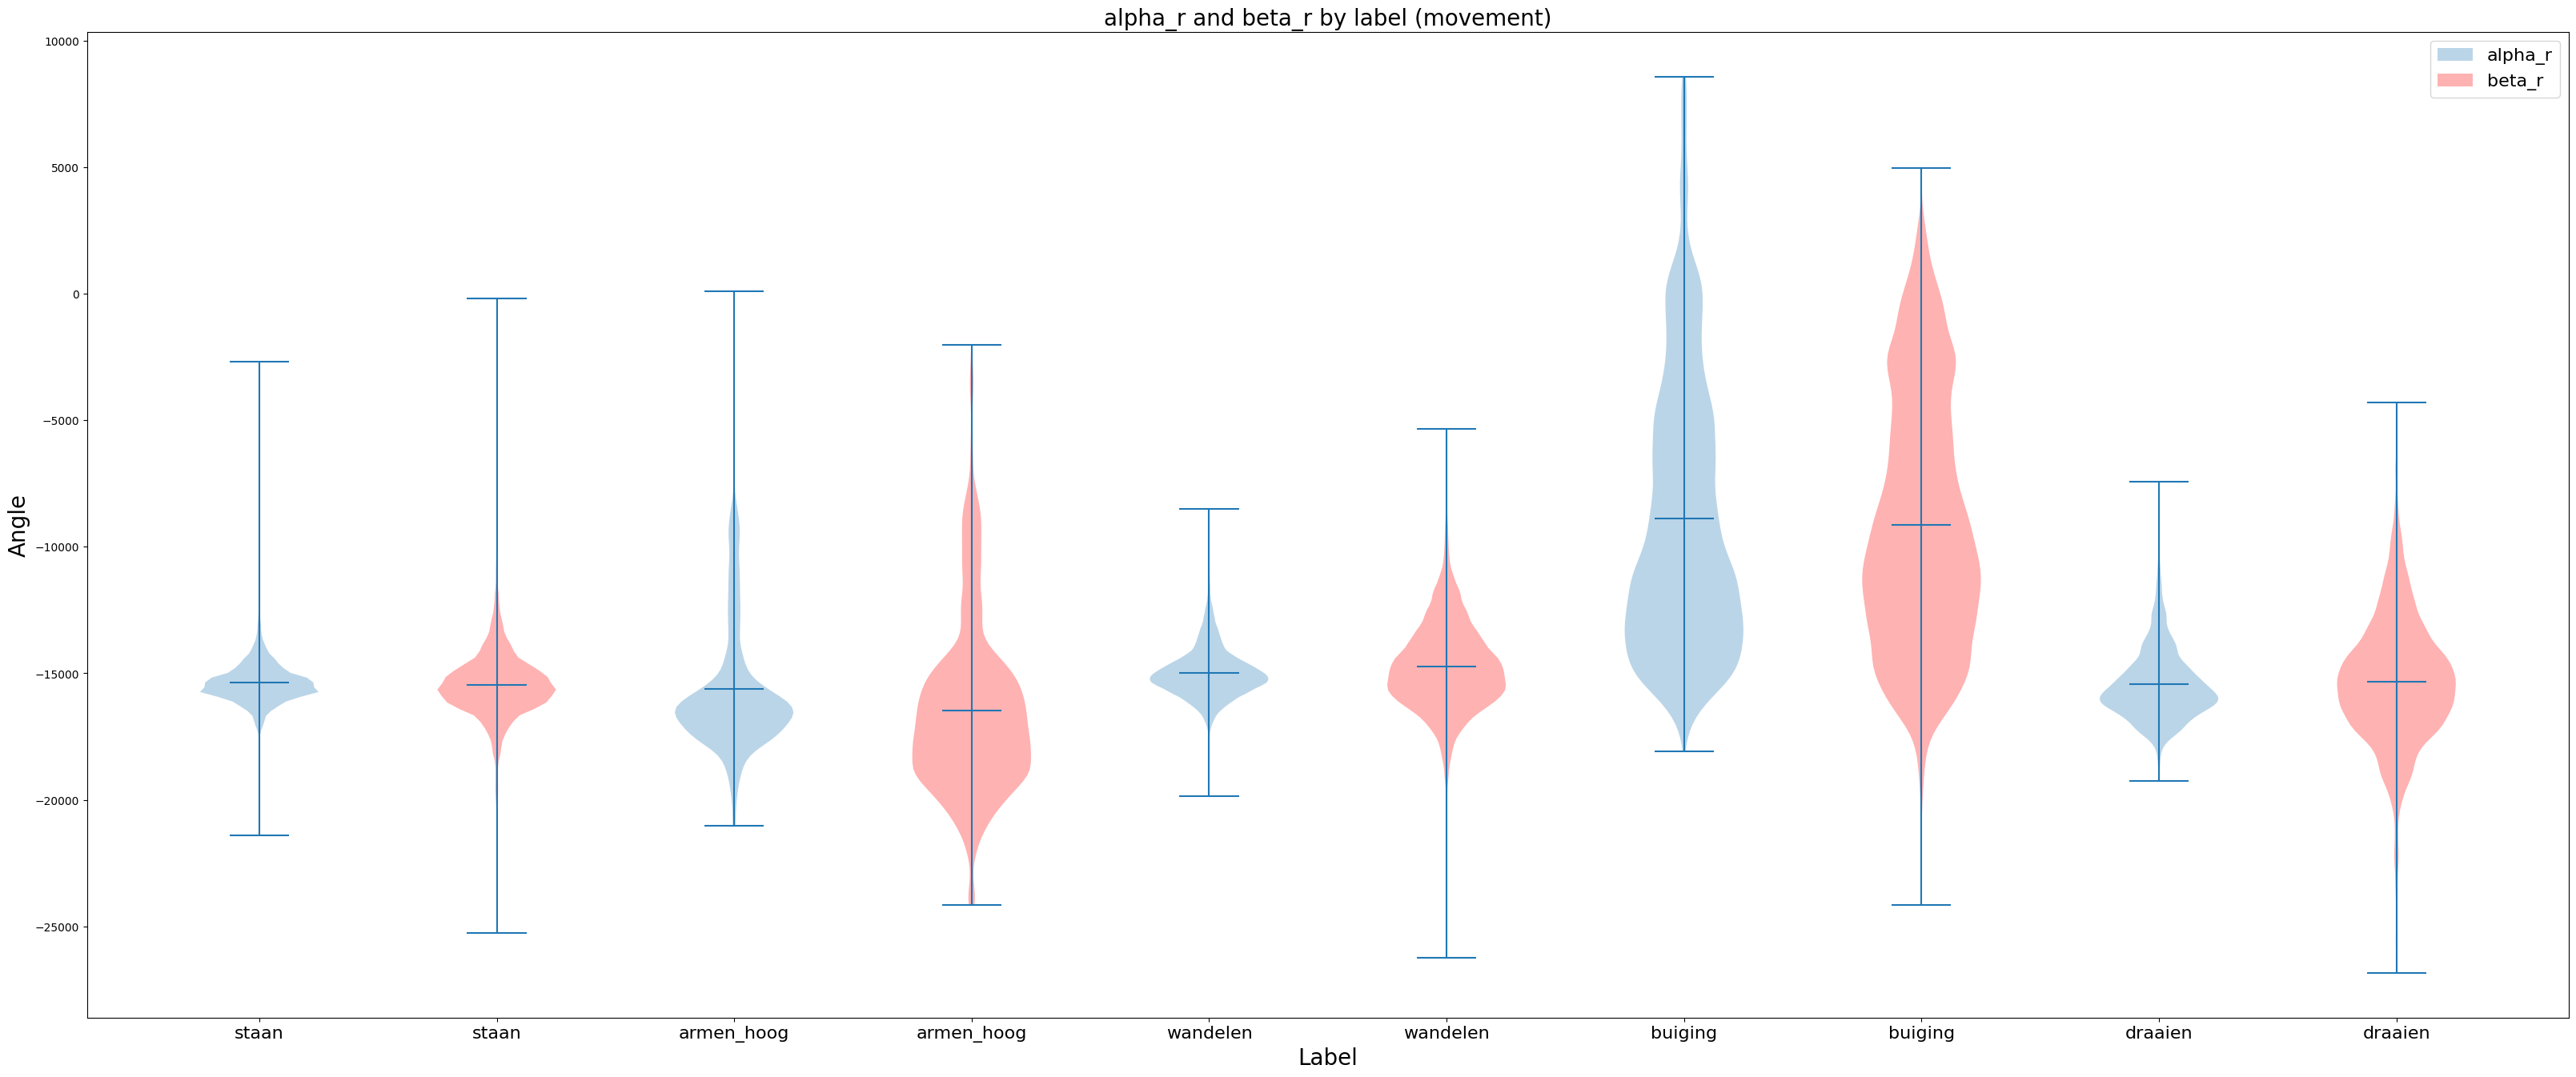

In [15]:
### Violin Plot of 'alpha_r' and 'beta_r' by 'label'

data_to_violin = [df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
                df_analysis['beta_r'][df_analysis['label'] == 'staan'],
                df_analysis['alpha_r'][df_analysis['label'] == 'armen_hoog'],
                df_analysis['beta_r'][df_analysis['label'] == 'armen_hoog'],
                df_analysis['alpha_r'][df_analysis['label'] == 'wandelen'],
                df_analysis['beta_r'][df_analysis['label'] == 'wandelen'],
                df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
                df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
                df_analysis['alpha_r'][df_analysis['label'] == 'draaien'],
                df_analysis['beta_r'][df_analysis['label'] == 'draaien']]

fig = plt.figure(figsize=(40, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ['staan', 'staan', 'armen_hoog', 'armen_hoog', 'wandelen', 'wandelen', 'buiging', 'buiging', 'draaien', 'draaien']

vp = ax.violinplot(data_to_violin, showmeans=True)

vp['bodies'][1].set_facecolor('red')
vp['bodies'][3].set_facecolor('red')
vp['bodies'][5].set_facecolor('red')
vp['bodies'][7].set_facecolor('red')
vp['bodies'][9].set_facecolor('red')

plt.title('alpha_r and beta_r by label (movement)', fontsize=20)
plt.xlabel('Label', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.xticks(x_pos, x_labels, fontsize=16)
plt.legend([vp['bodies'][0], vp['bodies'][1]], ['alpha_r', 'beta_r'], fontsize=16)
plt.show()

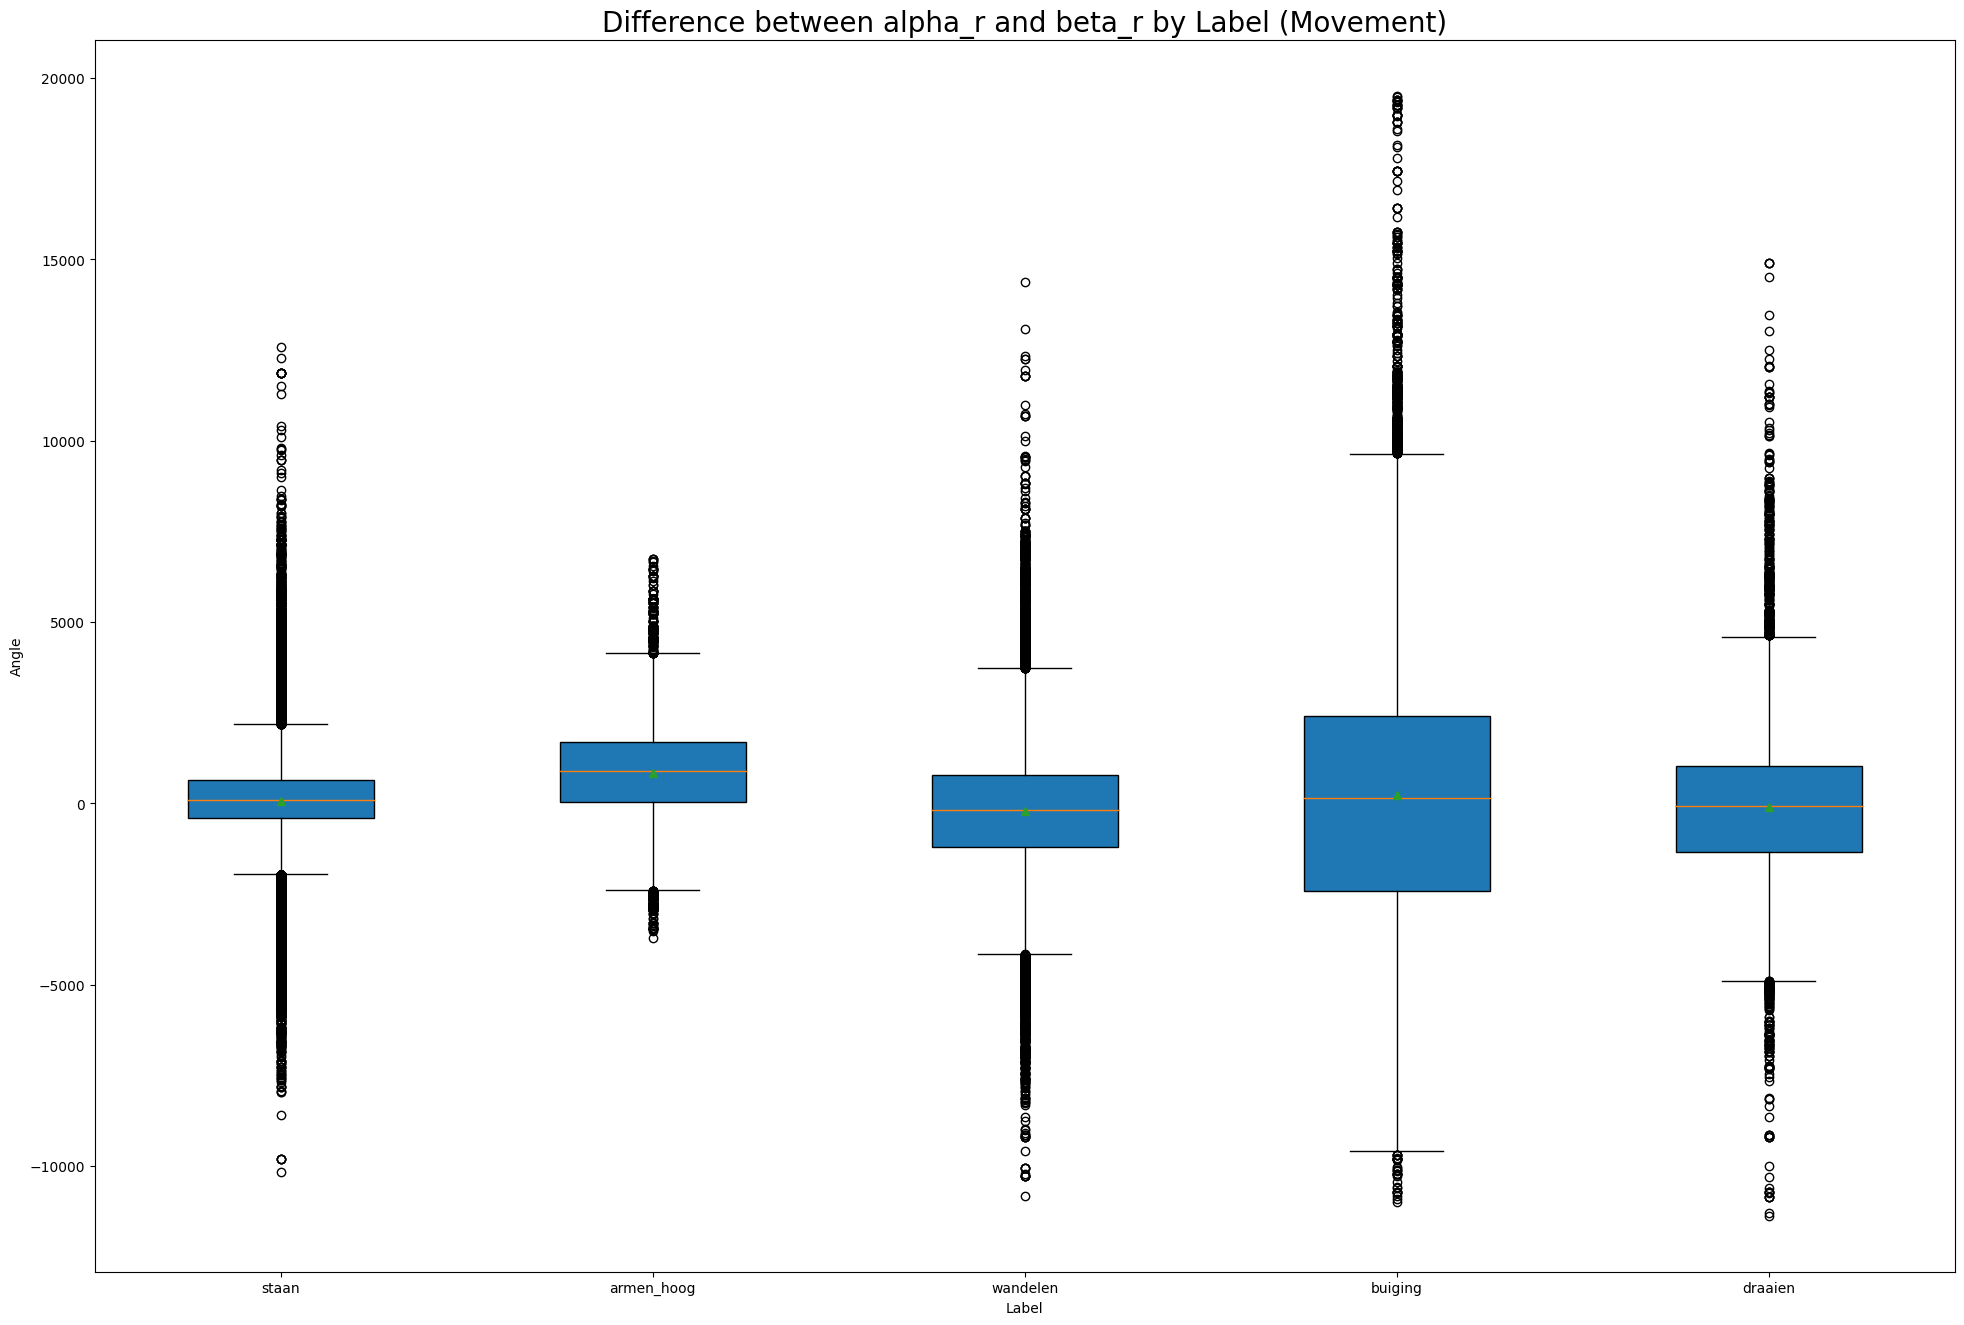

In [13]:
### Box Plot of difference between 'alpha_r' and 'beta_r' by 'label'

fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Difference between alpha_r and beta_r by Label (Movement)", fontsize= 20)
ax.set

data =  [df_analysis['ab_r_diff'][df_analysis['label'] == 'staan'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'armen_hoog'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'wandelen'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'buiging'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'draaien']]

bp = ax.boxplot(data,
           labels= ['staan', 'armen_hoog', 'wandelen', 'buiging', 'draaien'],
           showmeans= True, patch_artist=True)

plt.xlabel("Label")
plt.ylabel("Angle")

plt.show()

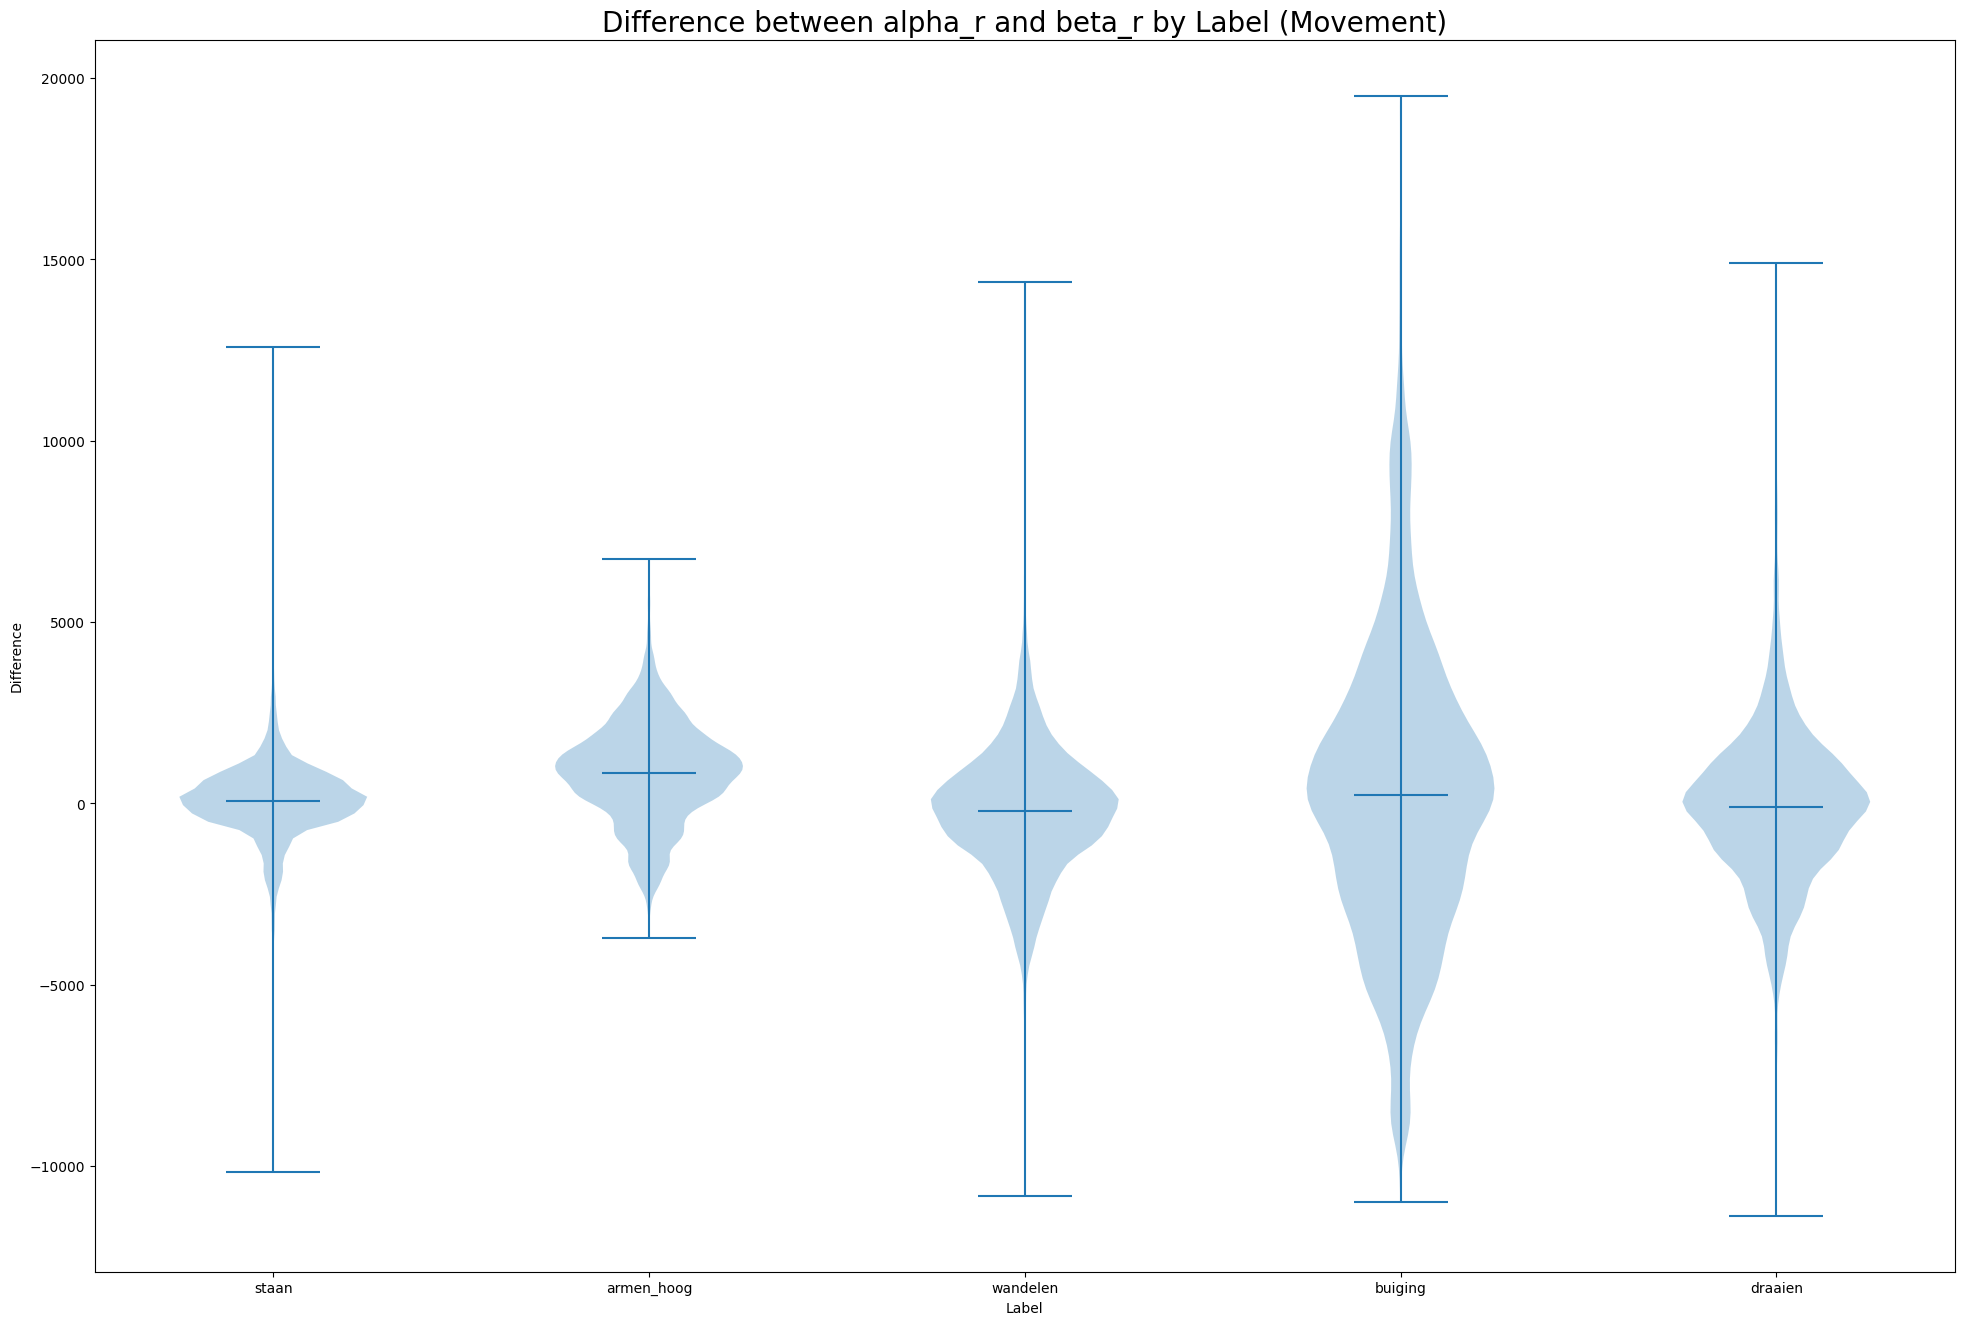

In [14]:
### Violin plot of difference between 'alpha_r' and 'beta_r' by 'label'

data_to_violin = [df_analysis['ab_r_diff'][df_analysis['label'] == 'staan'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'armen_hoog'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'wandelen'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'buiging'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'draaien']]

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5]
x_labels = ['staan', 'armen_hoog', 'wandelen', 'buiging', 'draaien']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

plt.title('Difference between alpha_r and beta_r by Label (Movement)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Difference')
plt.xticks(x_pos, x_labels)

plt.show()

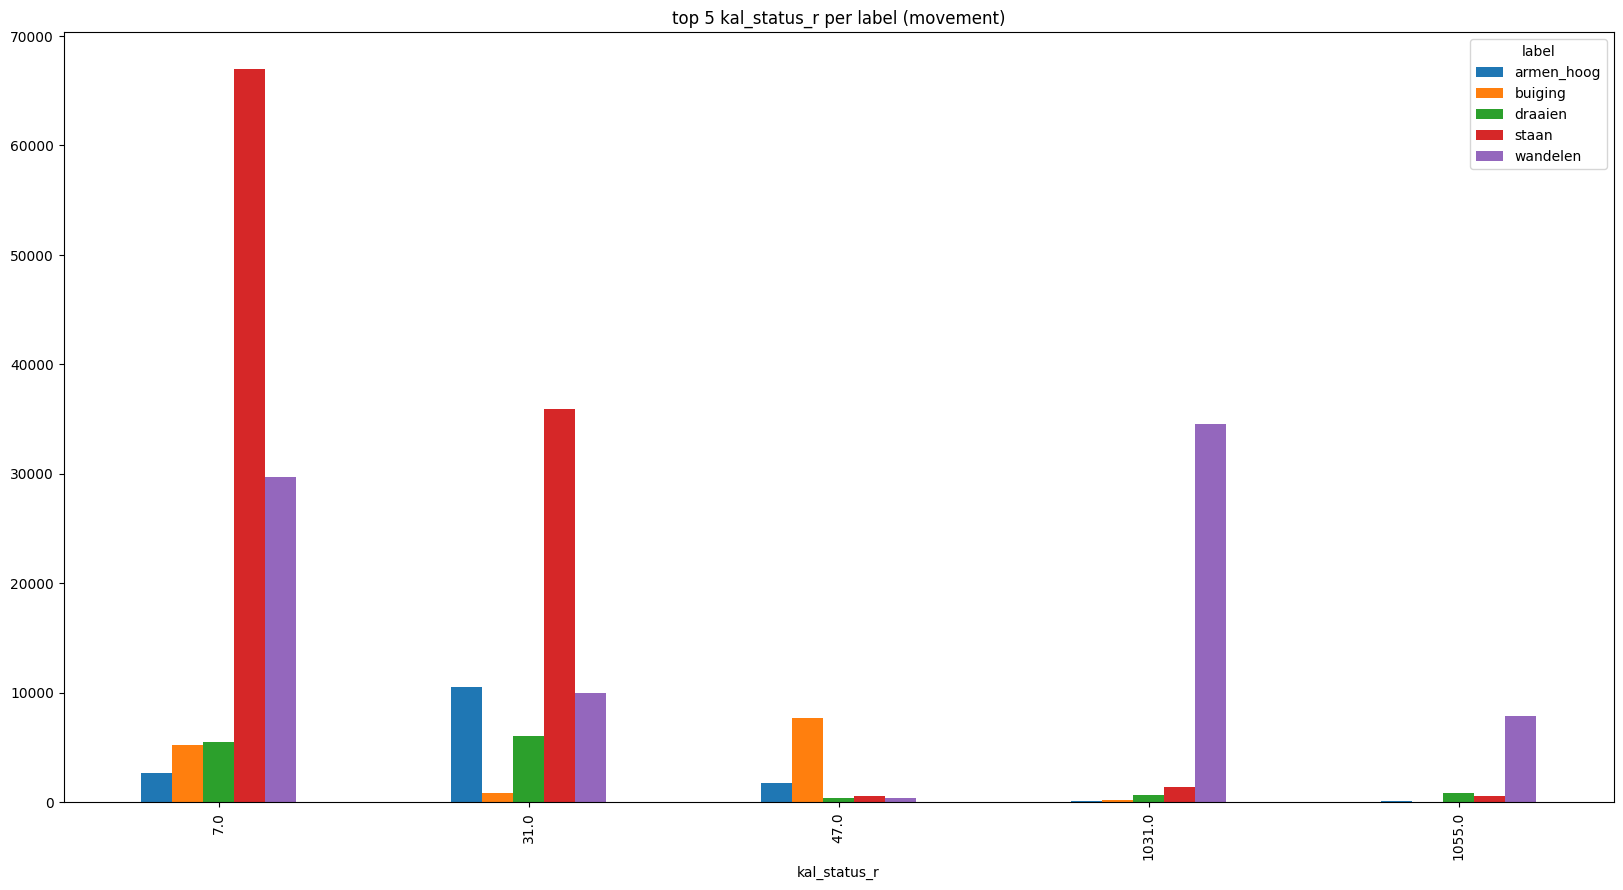

In [26]:
ksr_label = df_analysis[['kal_status_r', 'label']]
kal_status_top = ksr_label.loc[ksr_label['kal_status_r'].isin([7.0, 31.0, 1031.0, 47.0, 1055.0])]

kal_status_top.groupby('kal_status_r')['label'].value_counts().unstack().plot(kind='bar', figsize=(20,10))
plt.title('top 5 kal_status_r per label (movement)')
plt.show()